In [1]:
from tqdm import tqdm
import random
import math
import time
import sys
sys.path.append("../")
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

from cachingalgo.full_observation.single_cache import LU
from cachingalgo.request_generation.continuous import szipf

## Simulations of LU for Unit Time

In [2]:
cache = [5, 10, 15, 20, 25, 30, 35, 40]
hit_rate1 = np.zeros((len(cache),)) # LU
hit_rate2 = np.zeros((len(cache),)) # LU-LFU
hit_rate3 = np.zeros((len(cache),)) # LU-LFULite[C]
hit_rate4 = np.zeros((len(cache),)) # LU-LFULite(V)[C]
hit_rate5 = np.zeros((len(cache),)) # LU-LFULite[2C]
hit_rate6 = np.zeros((len(cache),)) # LU-LFULite(V)[2C]
hit_rate7 = np.zeros((len(cache),)) # LU-LFULite[3C]
hit_rate8 = np.zeros((len(cache),)) # LU-LFULite(V)[3C]
hit_rate9 = np.zeros((len(cache),)) # Upper-Bound

iterations = 1
for j in range(iterations):
    szdata = szipf(L = 400, count = 50_000, a = 0.8)

    req = szdata['req']
    L = szdata['prob'].shape[0]
    totalreq = req.shape[0]

    for itr, cache_size in enumerate(tqdm(cache)):
        hits1 = 0
        hits2 = 0
        hits3 = 0
        hits4 = 0
        hits5 = 0
        hits6 = 0
        hits7 = 0
        hits8 = 0

        F = np.zeros((L,), dtype = 'int')
        # Class A
        F[:cache_size] = 5
        # Class B
        F[cache_size:2*cache_size] = 500
        # Class D
        F[2*cache_size:] = 5
        
        window = int(cache_size*cache_size*math.log(L))
        
        alg1 = LU(L = L, F = F, cache_size = cache_size, arr = szdata['prob'])
        alg2 = LU(L = L, F = F, cache_size = cache_size, method = 'lfu')
        alg3 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = cache_size)
        alg4 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = cache_size, useF=True)
        alg5 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = 2*cache_size)
        alg6 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = 2*cache_size, useF=True)
        alg7 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = 3*cache_size)
        alg8 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = 3*cache_size, useF=True)
        
        for i in range(req.shape[0]):
            request = req[i]

            cachehit1 = alg1.currcache(req = request, time = i)
            
            alg2.update(request)
            cachehit2 = alg2.currcache(req = request, time = i)

            alg3.update(request, ithreq = i)
            cachehit3 = alg3.currcache(req = request, time = i, ithreq = i)

            alg4.update(request, ithreq = i)
            cachehit4 = alg4.currcache(req = request, time = i, ithreq = i)
            
            alg5.update(request, ithreq = i)
            cachehit5 = alg5.currcache(req = request, time = i, ithreq = i)

            alg6.update(request, ithreq = i)
            cachehit6 = alg6.currcache(req = request, time = i, ithreq = i)

            alg7.update(request, ithreq = i)
            cachehit7 = alg7.currcache(req = request, time = i, ithreq = i)
            
            alg8.update(request, ithreq = i)
            cachehit8 = alg8.currcache(req = request, time = i, ithreq = i)

            currcache1 = cachehit1['cache']
            hits1 += cachehit1['cache_hit']

            currcache2 = cachehit2['cache']
            hits2 += cachehit2['cache_hit']  

            currcache3 = cachehit3['cache']
            hits3 += cachehit3['cache_hit'] 
            
            currcache4 = cachehit4['cache']
            hits4 += cachehit4['cache_hit']  
            
            currcache5 = cachehit5['cache']
            hits5 += cachehit5['cache_hit']

            currcache6 = cachehit6['cache']
            hits6 += cachehit6['cache_hit']  

            currcache7 = cachehit7['cache']
            hits7 += cachehit7['cache_hit'] 
            
            currcache8 = cachehit8['cache']
            hits8 += cachehit8['cache_hit']  

        hit_rate1[itr] += (hits1/totalreq)
        hit_rate2[itr] += (hits2/totalreq)
        hit_rate3[itr] += (hits3/totalreq)
        hit_rate4[itr] += (hits4/totalreq)
        hit_rate5[itr] += (hits5/totalreq)
        hit_rate6[itr] += (hits6/totalreq)
        hit_rate7[itr] += (hits7/totalreq)
        hit_rate8[itr] += (hits8/totalreq)
        
        hit_rate9[itr] = min(sum(szdata['prob'][:cache_size]), sum(((szdata['prob']**2)*F)/(1+(szdata['prob']*F))))  
        
hit_rate1 = hit_rate1/iterations
hit_rate2 = hit_rate2/iterations
hit_rate3 = hit_rate3/iterations
hit_rate4 = hit_rate4/iterations
hit_rate5 = hit_rate5/iterations
hit_rate6 = hit_rate6/iterations
hit_rate7 = hit_rate7/iterations
hit_rate8 = hit_rate8/iterations

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [18:06<00:00, 135.82s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


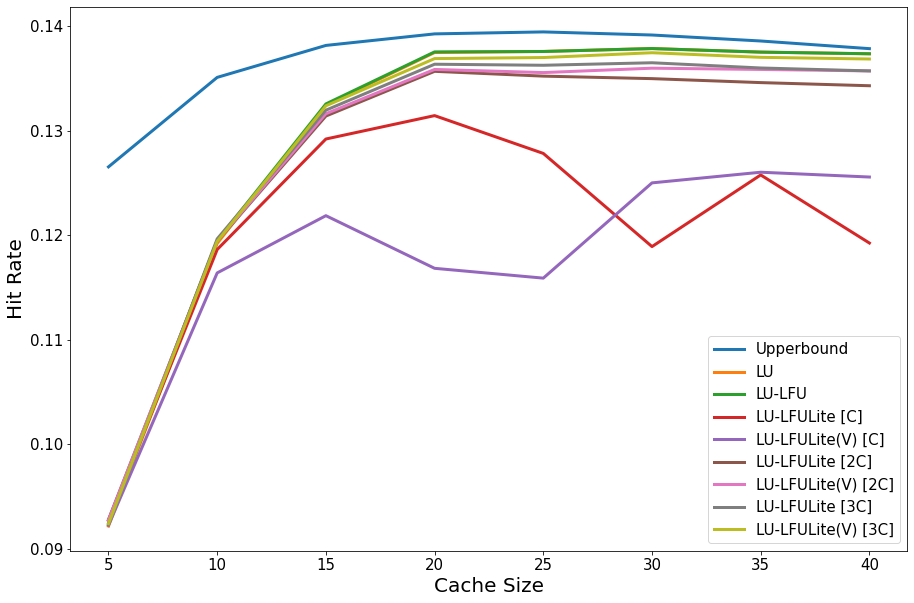

In [4]:
x = cache

plt.figure(figsize=(15,10))

plt.plot(x, hit_rate9, label="Upperbound", linewidth=3)
plt.plot(x, hit_rate1, label="LU", linewidth=3)
plt.plot(x, hit_rate2, label = "LU-LFU", linewidth=3)
plt.plot(x, hit_rate3, label = "LU-LFULite [C]", linewidth=3)
plt.plot(x, hit_rate4, label = "LU-LFULite(V) [C]", linewidth=3)
plt.plot(x, hit_rate5, label = "LU-LFULite [2C]", linewidth=3)
plt.plot(x, hit_rate6, label = "LU-LFULite(V) [2C]", linewidth=3)
plt.plot(x, hit_rate7, label = "LU-LFULite [3C]", linewidth=3)
plt.plot(x, hit_rate8, label = "LU-LFULite(V) [3C]", linewidth=3)

plt.legend(loc = 'lower right', prop={"size":15})
plt.xlabel('Cache Size', fontsize=20)
plt.ylabel('Hit Rate', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig('../plots/full_observation/single_cache/allluhit.eps')
plt.show()

## Simulations of LU for Poisson Time

In [2]:
cache = [5, 10, 15, 20, 25, 30, 35, 40]
hit_rate1 = np.zeros((len(cache),)) # LU
hit_rate2 = np.zeros((len(cache),)) # LU-LFU
hit_rate3 = np.zeros((len(cache),)) # LU-LFULite[3C]
hit_rate4 = np.zeros((len(cache),)) # LU-LFULite(V)[3C]
hit_rate5 = np.zeros((len(cache),)) # Upper-Bound

iterations = 1
for j in range(iterations):
    szdata = szipf(L = 400, count = 10_000, a = 0.8)

    req = szdata['req']
    L = szdata['prob'].shape[0]
    totalreq = req.shape[0]
    arr_times = np.random.exponential(scale = 0.5, size = totalreq) # Arrival Times

    for itr, cache_size in enumerate(tqdm(cache)):
        hits1 = 0
        hits2 = 0
        hits3 = 0
        hits4 = 0
        hits5 = 0
        hits6 = 0
        hits7 = 0
        hits8 = 0

        F = np.zeros((L,), dtype = 'int')
        # Class A
        F[:cache_size] = 5
        # Class B
        F[cache_size:2*cache_size] = 500
        # Class D
        F[2*cache_size:] = 5
        
        req_arr_times = zip(szdata['req'], arr_times)
        window = int(cache_size*cache_size*math.log(L))
        
        alg1 = LU(L = L, F = F, cache_size = cache_size, arr = szdata['prob'])
        alg2 = LU(L = L, F = F, cache_size = cache_size, method = 'lfu')
        alg3 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = 3*cache_size)
        alg4 = LU(L = L, F = F, cache_size = cache_size, method = 'lfulite', window=window, freqtop = 3*cache_size, useF=True)
        
        sim_start = time.time()
        upd_time = 0
        ithreq = 0
        
        for request, delay in req_arr_times:
            # Checking whether delay time is positive or not
            if delay-upd_time >= 0:
                # Delaying the program in order mimic the poisson process
                time.sleep(delay-upd_time)
                
            upd_start = time.time()

            cachehit1 = alg1.currcache(req = request, time=time.time()-sim_start)
            
            alg2.update(request)
            cachehit2 = alg2.currcache(req = request, time=time.time()-sim_start)

            alg3.update(request, ithreq = ithreq)
            cachehit3 = alg3.currcache(req = request, time=time.time()-sim_start, ithreq = ithreq)

            alg4.update(request, ithreq = ithreq)
            cachehit4 = alg4.currcache(req = request, time=time.time()-sim_start, ithreq = ithreq)

            currcache1 = cachehit1['cache']
            hits1 += cachehit1['cache_hit']

            currcache2 = cachehit2['cache']
            hits2 += cachehit2['cache_hit']  

            currcache3 = cachehit3['cache']
            hits3 += cachehit3['cache_hit'] 
            
            currcache4 = cachehit4['cache']
            hits4 += cachehit4['cache_hit']  
            
            # Calculating the time taken by the algorithm to update
            upd_time = time.time() - upd_start  
            
            # Increasing the request counter
            ithreq += 1
            

        hit_rate1[itr] += (hits1/totalreq)
        hit_rate2[itr] += (hits2/totalreq)
        hit_rate3[itr] += (hits3/totalreq)
        hit_rate4[itr] += (hits4/totalreq) 
        hit_rate5[itr] = min(sum(szdata['prob'][:cache_size]), sum(((szdata['prob']**2)*F)/(1+(szdata['prob']*F))))
        
hit_rate1 = hit_rate1/iterations
hit_rate2 = hit_rate2/iterations
hit_rate3 = hit_rate3/iterations
hit_rate4 = hit_rate4/iterations
hit_rate5 = hit_rate5/iterations

100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [11:30:13<00:00, 5176.64s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


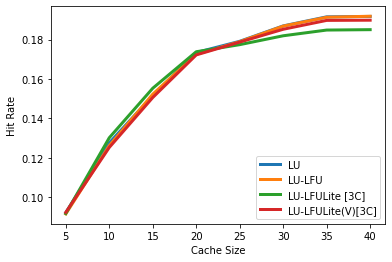

In [5]:
import matplotlib.pyplot as plt

x = cache

#plt.figure(figsize=(15,10))

plt.plot(x, hit_rate1, label = "LU", linewidth=3)
plt.plot(x, hit_rate2, label = "LU-LFU", linewidth=3)
plt.plot(x, hit_rate3, label = "LU-LFULite [3C]", linewidth=3)
plt.plot(x, hit_rate4, label="LU-LFULite(V)[3C]", linewidth=3)


plt.legend(loc = 'best')
plt.xlabel('Cache Size')
plt.ylabel('Hit Rate')
plt.savefig('../plots/full_observation/single_cache/poissonalllu0.5.eps')
plt.show()

